# Silly project about real and fake Nordic flags

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
names = ['Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden']
dims = [[28,34], [11,18], [18, 25], [8, 11], [5, 8]]
ch = [[3,1,4.5], [5,3,10], [7,1,2,1,14], [6,1,2,1,12], [5,2,9]]
cv = [[3,1,3], [4,3,4], [7,1,2,1,7], [6,1,2,1,6], [4,2,4]]
colors = np.array([ [(198, 12, 48), (255, 255, 255)], 
           [(255, 255, 255), (0, 47, 108)], 
           [(2, 82, 156),  (220, 30, 53)], 
           [(200, 16, 46),  (0, 48, 135)] , 
           [(0, 75, 135), (255, 205, 0)]])

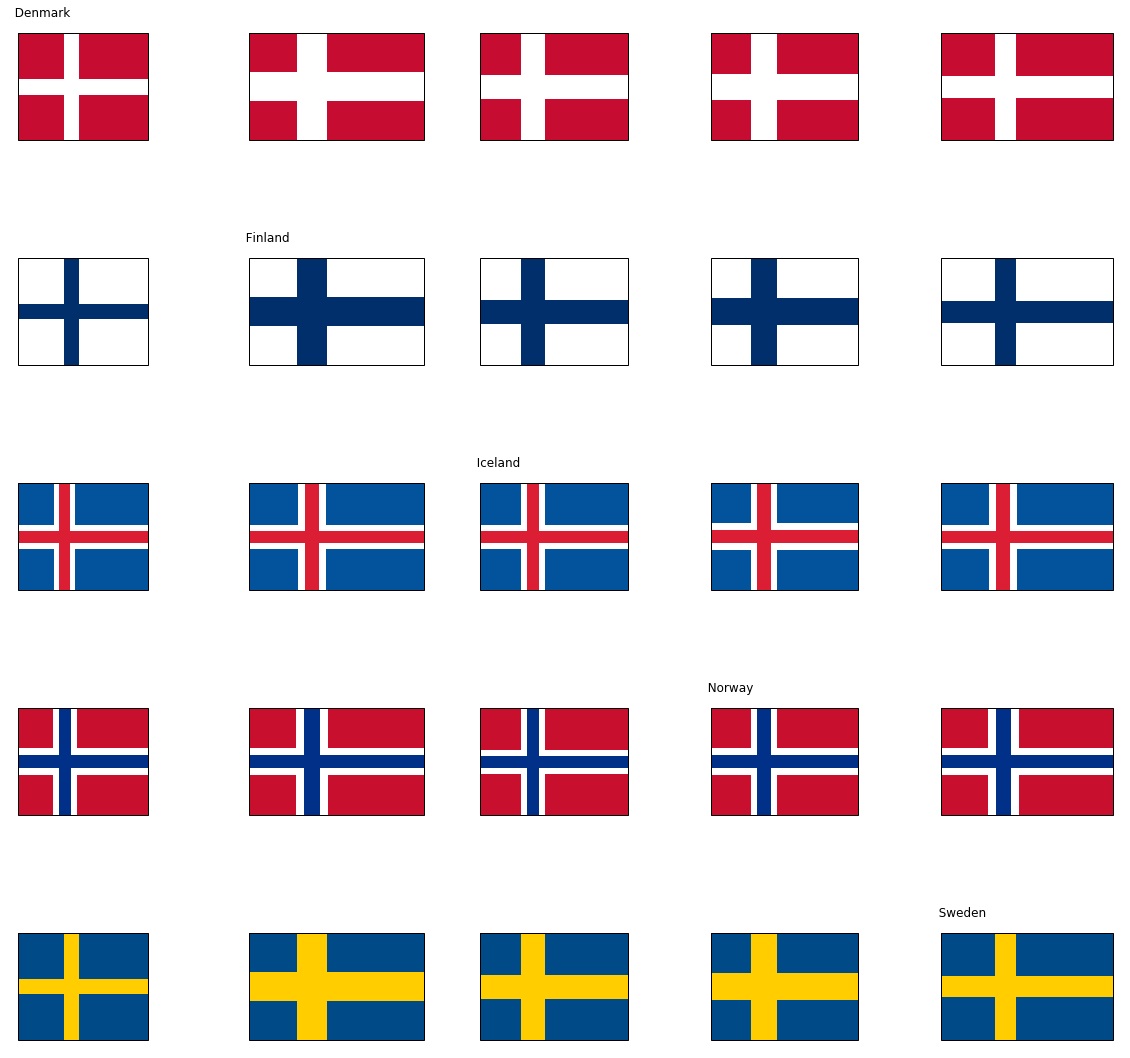

In [15]:
plt.figure(figsize=(20,20), facecolor='white')
for i in range(5):
    for j in range(5):
        ax = plt.subplot(5, 5, j*5+i+1)        
        h = 1/dims[i][0]*dims[i][1]
        ax.add_patch(plt.Rectangle((0, 0), h, 1, facecolor=colors[j,0]/255))
        if len(ch[j])==5: # A 3-color color (with a white cross)
            if len(ch[i])==5: # Proportions are also 3-color, so use them
                k = i
            else: # Flag proportions are 2-color, so use cross proportions from the color flag
                k = j
            ax.add_patch(plt.Rectangle((0, cv[k][0]/np.sum(cv[k])), 
                                       h, np.sum(cv[k][1:4])/np.sum(cv[k]), facecolor='white'))
            ax.add_patch(plt.Rectangle((ch[k][0]/np.sum(ch[k])*h, 0), 
                                       np.sum(ch[k][1:4])/np.sum(ch[k])*h, 1, facecolor='white'))
            ax.add_patch(plt.Rectangle((0, np.sum(cv[k][0:2])/np.sum(cv[k])), 
                                           h, cv[k][2]/np.sum(cv[k]), facecolor=colors[j,1]/255))
            ax.add_patch(plt.Rectangle((np.sum(ch[k][0:2])/np.sum(ch[k])*h, 0), 
                                       ch[k][2]/np.sum(ch[k])*h, 1, facecolor=colors[j,1]/255))
        else: # A 2-color color
            if len(ch[i])!=5: # And 2-color proportions, so just use them
                ax.add_patch(plt.Rectangle((0, cv[i][0]/np.sum(cv[i])), 
                                           h, cv[i][1]/np.sum(cv[i]), facecolor=colors[j,1]/255))
                ax.add_patch(plt.Rectangle((ch[i][0]/np.sum(cv[i]), 0), 
                                           cv[i][1]/np.sum(ch[i])*h, 1, facecolor=colors[j,1]/255))
            else: # 2-color color on 3-color proportions. Use the wider (white) corss
                ax.add_patch(plt.Rectangle((0, cv[i][0]/np.sum(cv[i])), 
                                           h, np.sum(cv[i][1:4])/np.sum(cv[i]), facecolor=colors[j,1]/255))
                ax.add_patch(plt.Rectangle((ch[i][0]/np.sum(cv[i]), 0), 
                                           np.sum(cv[i][1:4])/np.sum(ch[i])*h, 1, facecolor=colors[j,1]/255))
        ax.add_patch(plt.Rectangle((0, 0), h, 1, edgecolor='black', facecolor='none'))
        plt.xlim(-0.1, 1.7);
        plt.ylim(-0.1, 1.1);
        ax.set_aspect('equal')
        if i==j:
            plt.title('  '+names[i], loc='left')
        plt.axis('off')
        

Sources:

* https://www.reddit.com/r/vexillology/comments/htgmmo/despite_their_similar_appearances_the_nordic/
* https://www.schemecolor.com/norway-flag-colors.php